In [16]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import os,sys
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patches as mpatches
import matplotlib.image as mpimg
from numpy.linalg import inv

import numpy as np


In [21]:

# motherdirs=['redo_different_seeds_opal/1', 'redo_different_seeds_opal/0', 'redo_different_seeds_opal/2']
motherdirs=['validate_different_seeds_online/seed_'+str(i) for i in range(3)]
# motherdir='evaluate_NA_models/Res18_Pretrained/1_eva'
# motherdir='log_neural_architectures/collect_esatv3_2'
# posfiles=sorted([os.path.join(d[0],f) for d in os.walk(logroot+'/'+motherdir) for f in os.listdir(d[0]) if f.startswith('gt') and f.endswith('txt')])
# for p in posfiles: print p

In [26]:
def combine_runs_map(motherdirs):
    logroot='/esat/opal/kkelchte/docker_home/tensorflow/log'
    origin_arrow_map = np.asarray([[0.,0.],[7.,0.],[7.,1.5],[9.,0.],[7.,-1.5],[7.,0.]])
    transformed_arrow = origin_arrow_map[:]
    rotation_gazebo_map = np.asarray([[-1,0],[0,1]])
    img_type='esatv3'
    plt.cla()
    plt.clf()
    fig,ax = plt.subplots(1,figsize=(30,30))
    ax.set_title('Position Display')

    current_image = np.zeros((1069,1322))
    implot=ax.imshow(current_image)
    
    img_file=logroot+'/../../simsup_ws/src/simulation_supervised/simulation_supervised_demo/worlds/esatv3.png'
    current_image=mpimg.imread(img_file)
    implot=ax.imshow(current_image)
    legend=[]
    colors=['C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7']
    for mdindex, md in enumerate(motherdirs):
        print md
        posfiles=sorted([os.path.join(d[0],f) for d in os.walk(md) for f in os.listdir(d[0]) if f.startswith('gt') and f.endswith('txt')])
        color=colors[mdindex%len(colors)]
        for p in posfiles:
        #     print p
            # get positions of run
            positions=[[float(t) for t in l.strip().split(',')] for l in open(p,'r').readlines()]
            for posindex, pos in enumerate(positions):
                if posindex > 270: break
                assert len(pos) == 3
                x,y=pos[0],pos[1]
                # transform arrow
                drone_gazebo_orientation = np.asarray([[np.cos(pos[2]), -np.sin(pos[2])],[np.sin(pos[2]), np.cos(pos[2])]])
                # combine with rotation gazebo_map to get orientation from drone to map
                # combine with translation
                transformation_map_to_drone = np.zeros((3,3))
                transformation_map_to_drone[2,2] = 1
                transformation_map_to_drone[0:2,2] = x,y
                transformation_map_to_drone[0:2,0:2] = inv(np.matmul(rotation_gazebo_map, drone_gazebo_orientation))
                # transformation_map_to_drone[0:2,0:2] = np.identity(2)
                # apply transformation to points in arrow
                transformed_arrow=np.transpose(np.matmul(transformation_map_to_drone,np.concatenate([np.transpose(origin_arrow_map),np.ones((1,origin_arrow_map.shape[0]))],axis=0)))
                transformed_arrow=transformed_arrow[:,:2]

                # add patch
                ax.add_patch(patches.Polygon(transformed_arrow,linewidth=1,edgecolor=color,facecolor='None'))
        legend.append(mpatches.Patch(color=color, label=os.path.basename(md).replace('_', ' ')))
    plt.legend(handles=legend)
    plt.savefig(motherdirs[0]+'/../runs.png')

/esat/opal/kkelchte/docker_home/tensorflow/log/validate_different_seeds_online/seed_0
/esat/opal/kkelchte/docker_home/tensorflow/log/validate_different_seeds_online/seed_1
/esat/opal/kkelchte/docker_home/tensorflow/log/validate_different_seeds_online/seed_2


<Figure size 432x288 with 0 Axes>

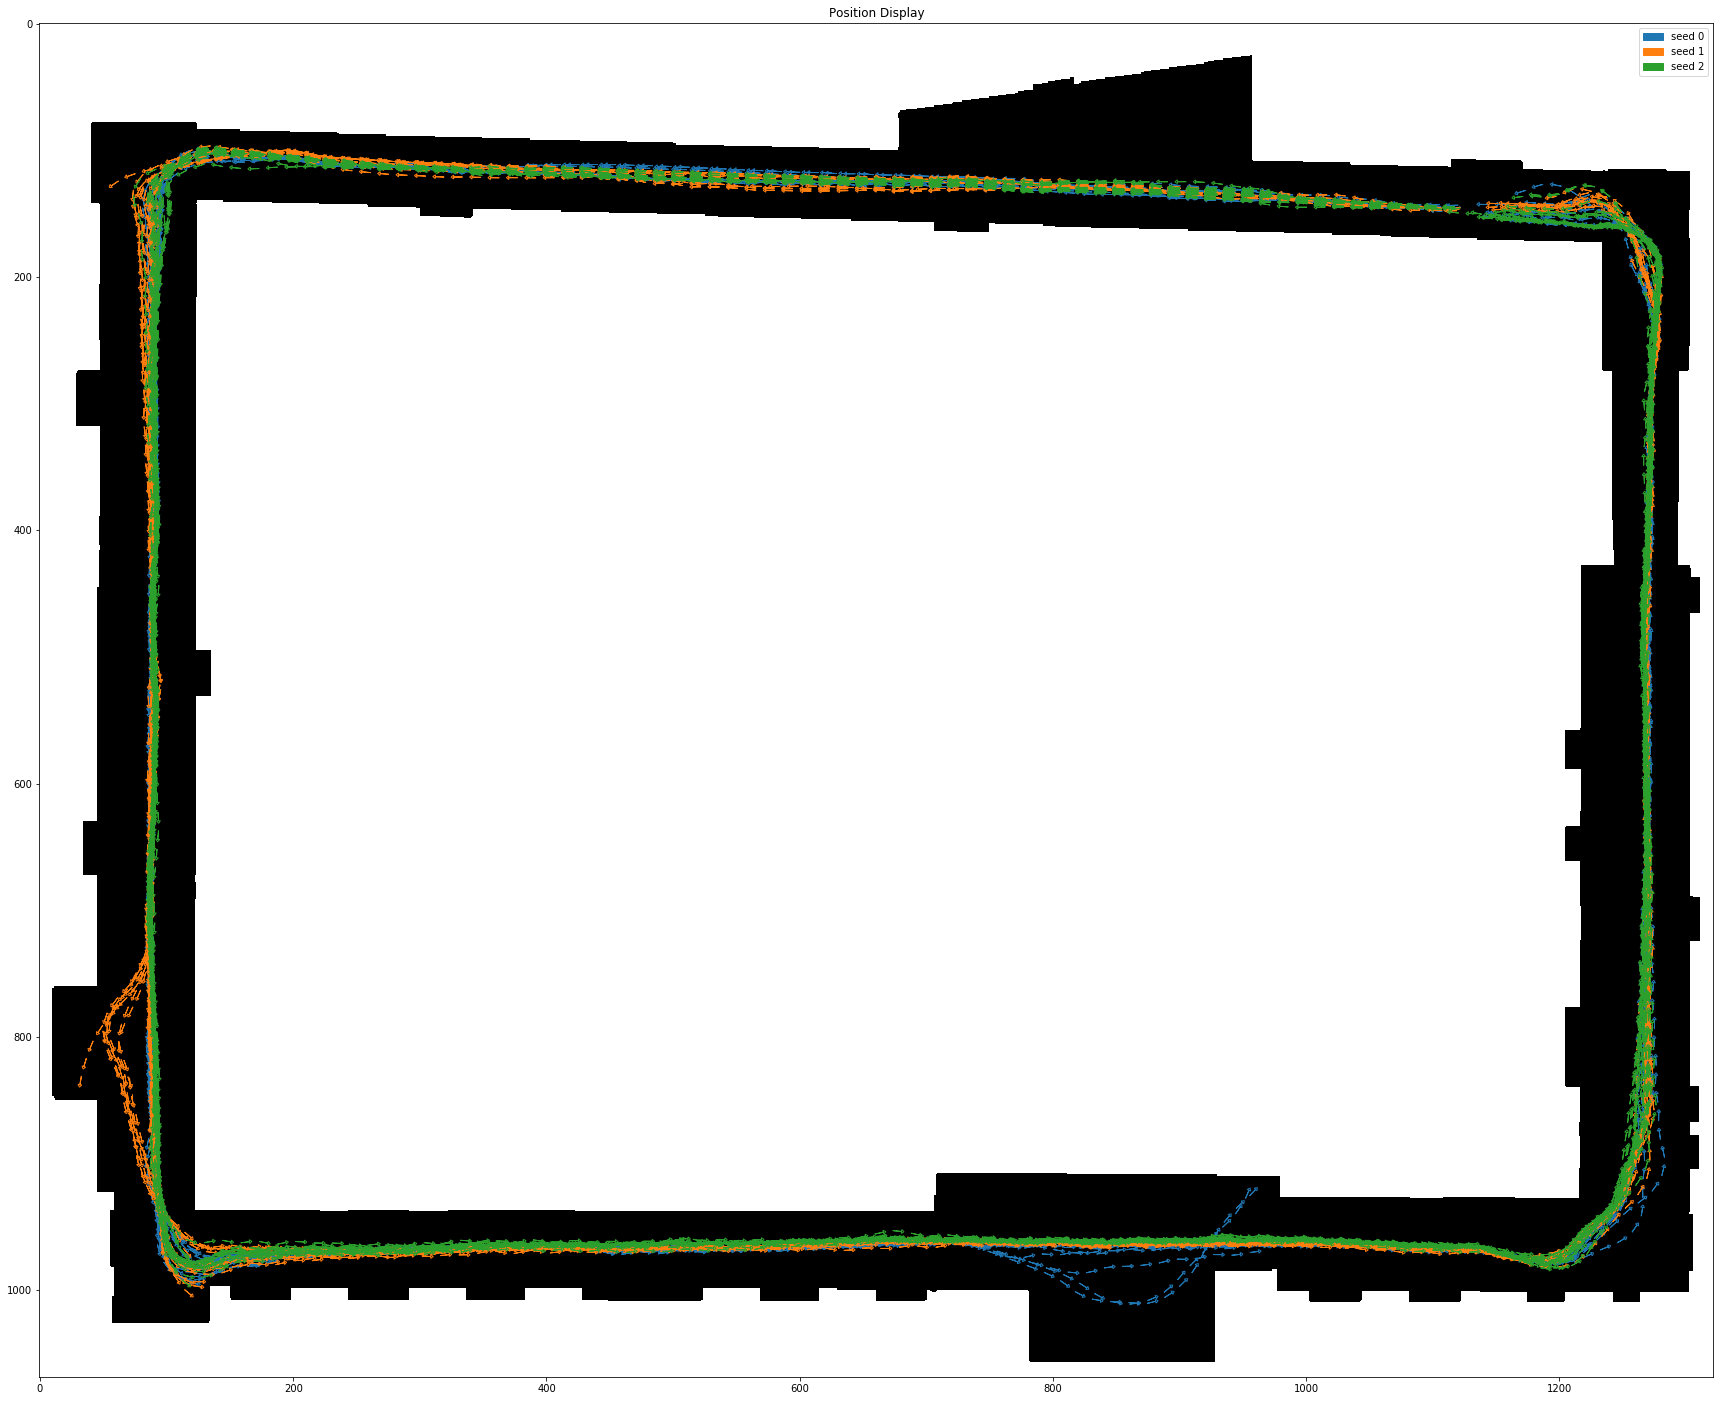

In [27]:
logroot='/esat/opal/kkelchte/docker_home/tensorflow/log/'
motherdirs=[logroot+'validate_different_seeds_online/seed_'+str(i) for i in range(3)]
combine_runs_map(motherdirs)

<Figure size 432x288 with 0 Axes>

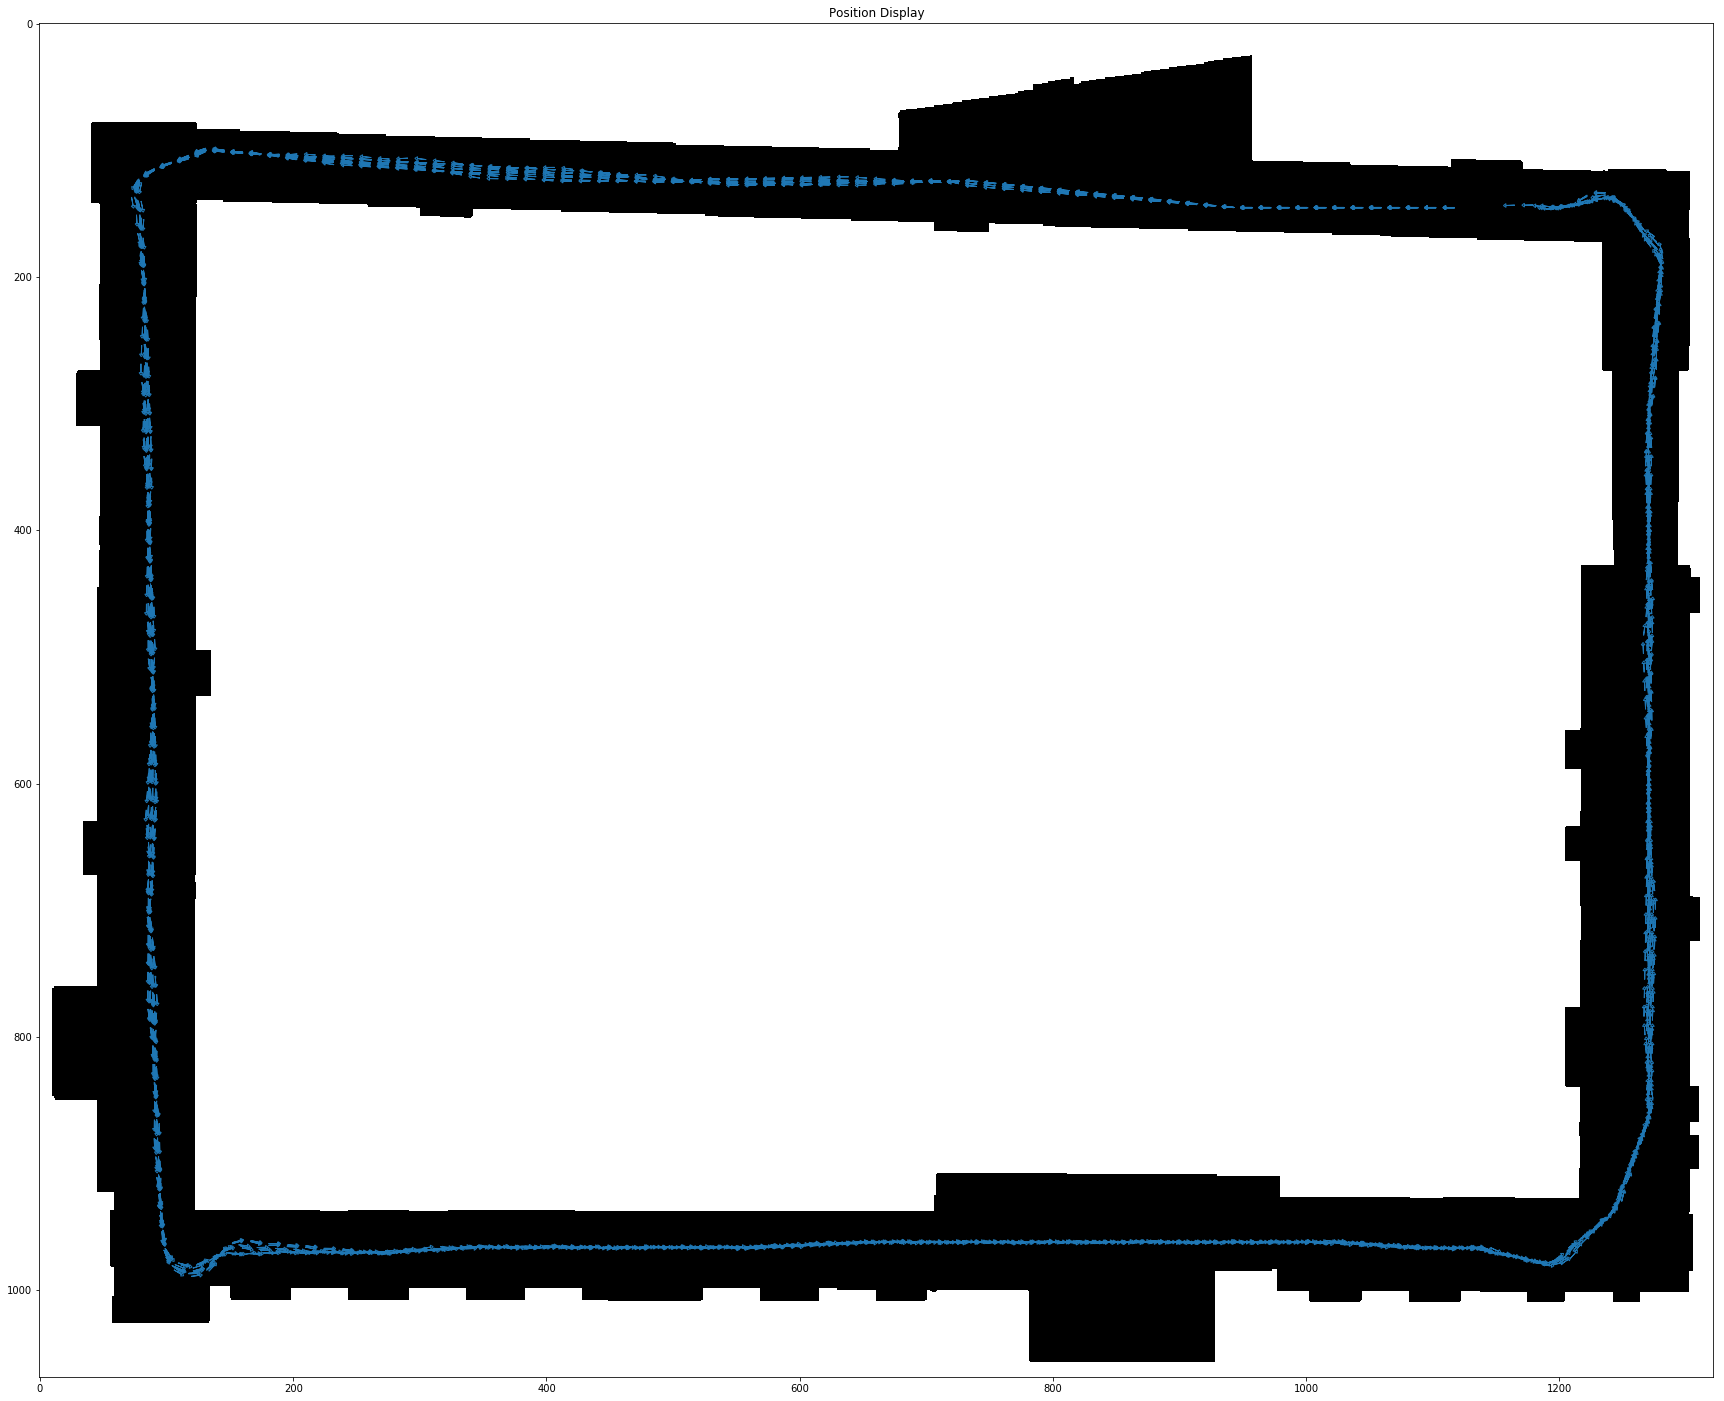

In [5]:
origin_arrow_map = np.asarray([[0.,0.],[7.,0.],[7.,1.5],[9.,0.],[7.,-1.5],[7.,0.]])
transformed_arrow = origin_arrow_map[:]
rotation_gazebo_map = np.asarray([[-1,0],[0,1]])
img_type='esatv3'
plt.cla()
plt.clf()
fig,ax = plt.subplots(1,figsize=(30,30))
ax.set_title('Position Display')

current_image = np.zeros((1069,1322))
implot=ax.imshow(current_image)

img_file=logroot+'/../../simsup_ws/src/simulation_supervised/simulation_supervised_demo/worlds/esatv3.png'
current_image=mpimg.imread(img_file)
implot=ax.imshow(current_image)


for p in posfiles:
#     print p
    # get positions of run
    positions=[[float(t) for t in l.strip().split(',')] for l in open(p,'r').readlines()]
    for posindex, pos in enumerate(positions):
        if posindex > 270: break
        assert len(pos) == 3
        x,y=pos[0],pos[1]
        # transform arrow
        drone_gazebo_orientation = np.asarray([[np.cos(pos[2]), -np.sin(pos[2])],[np.sin(pos[2]), np.cos(pos[2])]])
        # combine with rotation gazebo_map to get orientation from drone to map
        # combine with translation
        transformation_map_to_drone = np.zeros((3,3))
        transformation_map_to_drone[2,2] = 1
        transformation_map_to_drone[0:2,2] = x,y
        transformation_map_to_drone[0:2,0:2] = inv(np.matmul(rotation_gazebo_map, drone_gazebo_orientation))
        # transformation_map_to_drone[0:2,0:2] = np.identity(2)
        # apply transformation to points in arrow
        transformed_arrow=np.transpose(np.matmul(transformation_map_to_drone,np.concatenate([np.transpose(origin_arrow_map),np.ones((1,origin_arrow_map.shape[0]))],axis=0)))
        transformed_arrow=transformed_arrow[:,:2]
        
        # add patch
        ax.add_patch(patches.Polygon(transformed_arrow,linewidth=1,edgecolor='C0',facecolor='None'))
        
plt.show()

<Figure size 432x288 with 0 Axes>

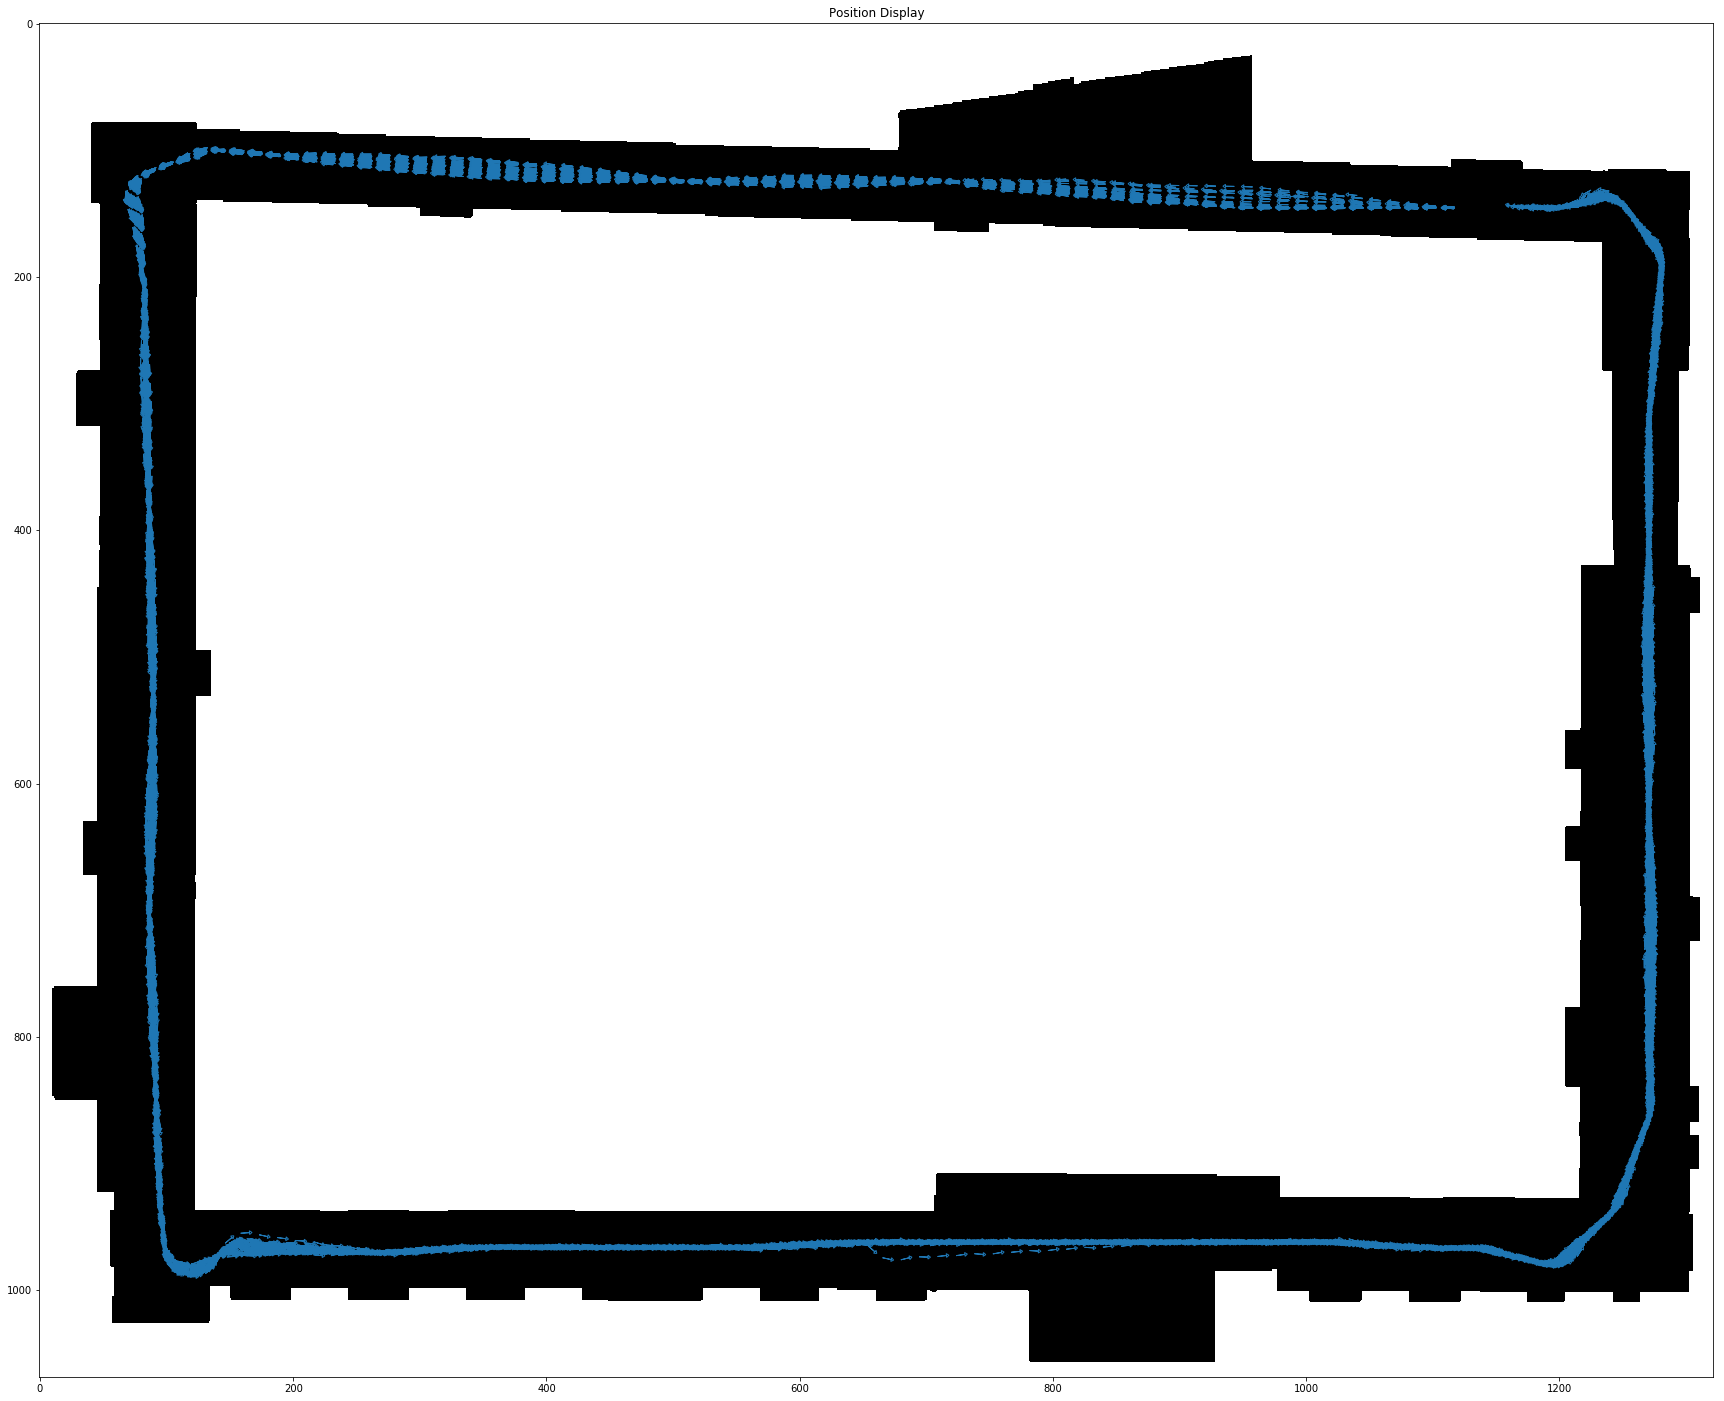

In [14]:
origin_arrow_map = np.asarray([[0.,0.],[7.,0.],[7.,1.5],[9.,0.],[7.,-1.5],[7.,0.]])
transformed_arrow = origin_arrow_map[:]
rotation_gazebo_map = np.asarray([[-1,0],[0,1]])
img_type='esatv3'
plt.cla()
plt.clf()
fig,ax = plt.subplots(1,figsize=(30,30))
ax.set_title('Position Display')

current_image = np.zeros((1069,1322))
implot=ax.imshow(current_image)

img_file=logroot+'/../../simsup_ws/src/simulation_supervised/simulation_supervised_demo/worlds/esatv3.png'
current_image=mpimg.imread(img_file)
implot=ax.imshow(current_image)


for p in posfiles:
#     print p
    # get positions of run
    positions=[[float(t) for t in l.strip().split(',')] for l in open(p,'r').readlines()]
    for posindex, pos in enumerate(positions):
        if posindex > 270: break
        assert len(pos) == 3
        x,y=pos[0],pos[1]
        # transform arrow
        drone_gazebo_orientation = np.asarray([[np.cos(pos[2]), -np.sin(pos[2])],[np.sin(pos[2]), np.cos(pos[2])]])
        # combine with rotation gazebo_map to get orientation from drone to map
        # combine with translation
        transformation_map_to_drone = np.zeros((3,3))
        transformation_map_to_drone[2,2] = 1
        transformation_map_to_drone[0:2,2] = x,y
        transformation_map_to_drone[0:2,0:2] = inv(np.matmul(rotation_gazebo_map, drone_gazebo_orientation))
        # transformation_map_to_drone[0:2,0:2] = np.identity(2)
        # apply transformation to points in arrow
        transformed_arrow=np.transpose(np.matmul(transformation_map_to_drone,np.concatenate([np.transpose(origin_arrow_map),np.ones((1,origin_arrow_map.shape[0]))],axis=0)))
        transformed_arrow=transformed_arrow[:,:2]
        
        # add patch
        ax.add_patch(patches.Polygon(transformed_arrow,linewidth=1,edgecolor='C0',facecolor='None'))
        
plt.show()